# Visualización de datos PDET
Este notebook muestra visualizaciones simples para los municipios PDET a partir del archivo JSON procesado.

## Importar librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Cargar y explorar datos

In [2]:
df = pd.read_json('../data/processed/pdet_municipalities_ready.json')
df.head()

,dept_code,muni_code,dept_name,muni_name,pdet_region,pdet_subregion,geom,area_km2,data_source,created_at,updated_at
0,13,13042,Bolívar,Arenal,Sur de Bolívar,Sur de Bolívar,"{'type': 'Polygon', 'coordinates': [[[-73.8804...",461.980005,DANE MGN,2025-11-03 02:23:12.943468,2025-11-03 02:23:12.943541
1,13,13160,Bolívar,Cantagallo,Sur de Bolívar,Sur de Bolívar,"{'type': 'Polygon', 'coordinates': [[[-73.8954...",881.510661,DANE MGN,2025-11-03 02:23:12.950384,2025-11-03 02:23:12.950423
2,13,13212,Bolívar,Córdoba,Montes de María,Montes de María,"{'type': 'Polygon', 'coordinates': [[[-74.9611...",597.342586,DANE MGN,2025-11-03 02:23:12.954021,2025-11-03 02:23:12.954057
3,13,13244,Bolívar,El Carmen de Bolívar,Montes de María,Montes de María,"{'type': 'Polygon', 'coordinates': [[[-75.3143...",946.273763,DANE MGN,2025-11-03 02:23:12.962669,2025-11-03 02:23:12.962707
4,13,13248,Bolívar,El Guamo,Montes de María,Montes de María,"{'type': 'Polygon', 'coordinates': [[[-74.8397...",383.239841,DANE MGN,2025-11-03 02:23:12.966530,2025-11-03 02:23:12.966565


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dept_code       146 non-null    int64         
 1   muni_code       146 non-null    int64         
 2   dept_name       146 non-null    object        
 3   muni_name       146 non-null    object        
 4   pdet_region     146 non-null    object        
 5   pdet_subregion  146 non-null    object        
 6   geom            146 non-null    object        
 7   area_km2        146 non-null    float64       
 8   data_source     146 non-null    object        
 9   created_at      146 non-null    datetime64[ns]
 10  updated_at      146 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 12.7+ KB


## Visualización de datos numéricos

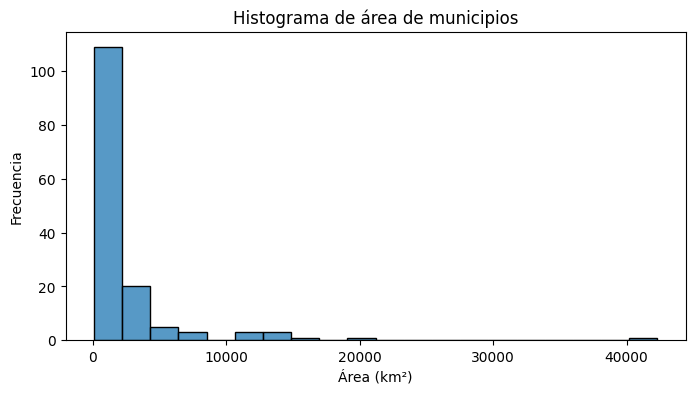

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(df['area_km2'], bins=20)
plt.xlabel('Área (km²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de área de municipios')
plt.show()

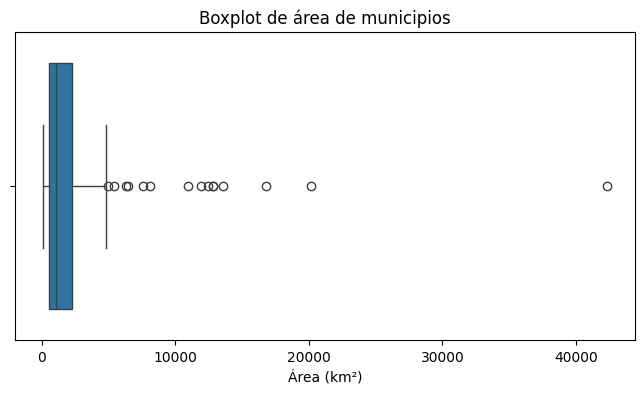

In [5]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['area_km2'])
plt.xlabel('Área (km²)')
plt.title('Boxplot de área de municipios')
plt.show()

## Visualización de datos categóricos

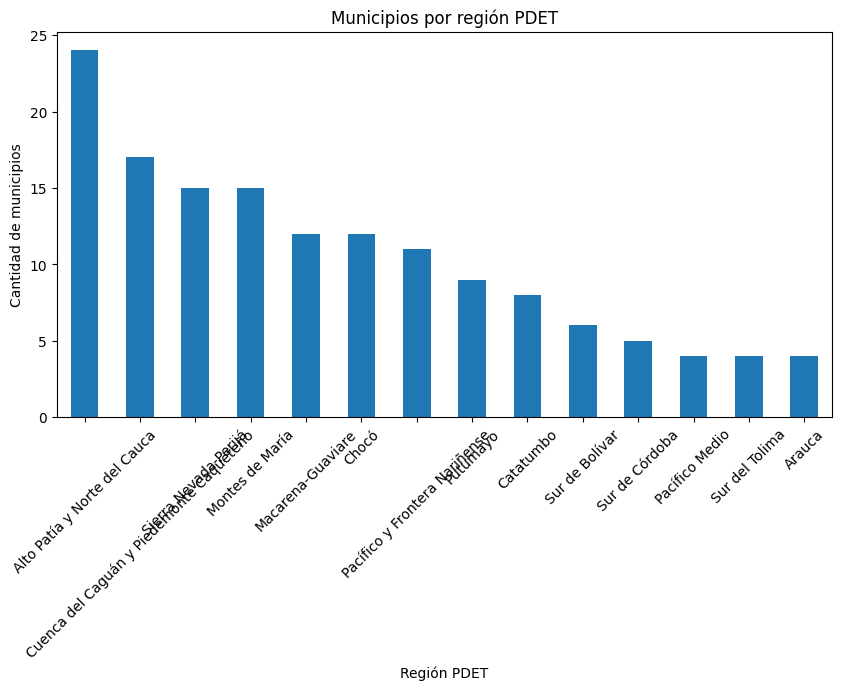

In [6]:
plt.figure(figsize=(10,5))
df['pdet_region'].value_counts().plot(kind='bar')
plt.xlabel('Región PDET')
plt.ylabel('Cantidad de municipios')
plt.title('Municipios por región PDET')
plt.xticks(rotation=45)
plt.show()

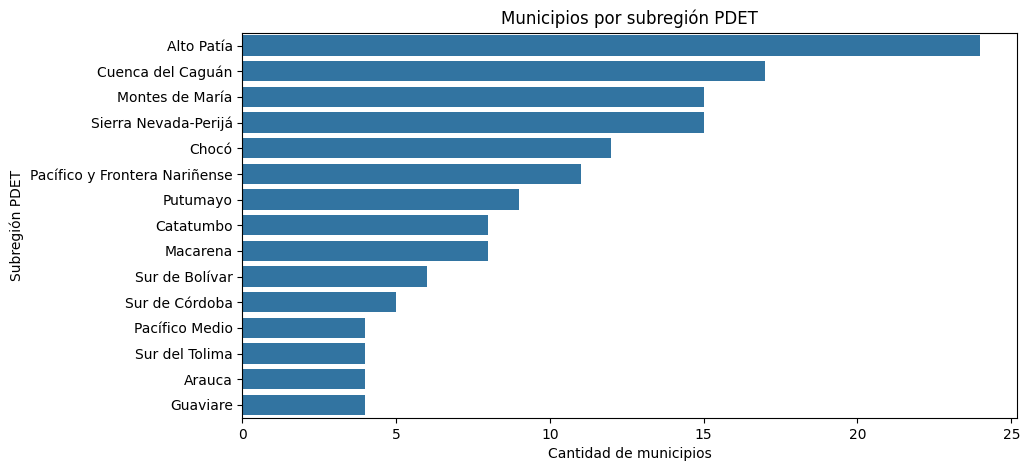

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['pdet_subregion'], order=df['pdet_subregion'].value_counts().index)
plt.xlabel('Cantidad de municipios')
plt.ylabel('Subregión PDET')
plt.title('Municipios por subregión PDET')
plt.show()

## Visualización de correlaciones

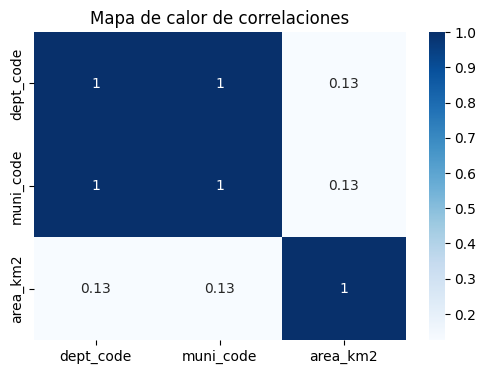

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues')
plt.title('Mapa de calor de correlaciones')
plt.show()